# `Build a classifier to identify if the Pizza is burnt or not`

In [1]:
##Import libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
## Initialising the CNN
classifier = Sequential()

In [4]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [5]:
## Flattening
classifier.add(Flatten())

In [6]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))

In [7]:
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [8]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

#### data importing and transforming and scaling

In [10]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2, # It will add shear image of the original image - eg -100 images
                                   zoom_range = 0.2,  # It will add zooming image of the original image - 100 images
                                   horizontal_flip = True) # It will add the flip images from the original image - 100 images
                                                        # so the total Imgages are 400

# Image Generator do all the preprocessing task of the image or it will take care the image scaling and feed the data 
# and rescaling it.


In [11]:
## Scaling test data
##no  data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
## Importing training data
train_set = train_datagen.flow_from_directory('C:/Users/Aakash Sharma/Desktop/AI/Pizza-case-study/train_set',
                                               target_size=(64,64),    
                                              # here 64, 64 will be same as the above convolutional input shape
                                               class_mode='binary')

Found 2000 images belonging to 2 classes.


In [17]:
#which is cat which is dog?
label_map = (train_set.class_indices)
print(label_map)

{'Burnt_Pizza': 0, 'Good_Pizza': 1}


In [18]:
## Importng test data
test_set = test_datagen.flow_from_directory('C:/Users/Aakash Sharma/Desktop/AI/Pizza-case-study/test_set',
                                            target_size=(64,64),                                           
                                            class_mode='binary')

Found 100 images belonging to 2 classes.


In [20]:
## fitting model to images
classifier.fit_generator(        # fit_generator perform the both test and training accuracy
        train_set,
        epochs=5,
        validation_data=test_set
        )

Epoch 1/5
63/63 [==============================] - 13s 212ms/step - loss: 0.4223 - accuracy: 0.8040 - val_loss: 0.8586 - val_accuracy: 0.7400
Epoch 2/5
63/63 [==============================] - 13s 212ms/step - loss: 0.3933 - accuracy: 0.8280 - val_loss: 0.2449 - val_accuracy: 0.8000
Epoch 3/5
63/63 [==============================] - 14s 216ms/step - loss: 0.3920 - accuracy: 0.8330 - val_loss: 0.2217 - val_accuracy: 0.8000
Epoch 4/5
63/63 [==============================] - 14s 216ms/step - loss: 0.3466 - accuracy: 0.8495 - val_loss: 0.1331 - val_accuracy: 0.8000
Epoch 5/5
63/63 [==============================] - 14s 218ms/step - loss: 0.3470 - accuracy: 0.8475 - val_loss: 0.2059 - val_accuracy: 0.7500


##### fitting model to images

In [35]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('C:/Users/Aakash Sharma/Desktop/AI/Pizza-case-study/inference/burnt1.jpg'
                           ,target_size =(64,64))


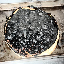

In [36]:
test_image

In [37]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [38]:
## For single prediction change the dimension . 

test_image=test_image.reshape(1,64,64,3)

In [39]:
result = classifier.predict(test_image)

In [40]:
result = result.round()

In [41]:
result

array([[0.]], dtype=float32)

In [42]:
## Class label of dog and cat

if result == 1:
    prediction = 'Good_Pizza'
else:
    prediction = 'Burnt_Pizza'
    

In [43]:
prediction

'Burnt_Pizza'